In [1]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [3]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 128)       73856 

In [4]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [5]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [6]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [7]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [8]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [9]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [10]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [11]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 15s 114ms/step - loss: 0.7468 - accuracy: 0.5115 - val_loss: 0.7137 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 6s 91ms/step - loss: 0.6963 - accuracy: 0.5280 - val_loss: 0.6844 - val_accuracy: 0.5100
Epoch 3/30
63/63 [==============================] - 6s 89ms/step - loss: 0.7034 - accuracy: 0.5555 - val_loss: 0.6701 - val_accuracy: 0.5160
Epoch 4/30
63/63 [==============================] - 5s 77ms/step - loss: 0.6522 - accuracy: 0.6080 - val_loss: 0.6362 - val_accuracy: 0.6210
Epoch 5/30
63/63 [==============================] - 5s 76ms/step - loss: 0.6299 - accuracy: 0.6575 - val_loss: 0.6322 - val_accuracy: 0.6360
Epoch 6/30
63/63 [==============================] - 5s 77ms/step - loss: 0.5713 - accuracy: 0.7005 - val_loss: 0.7715 - val_accuracy: 0.6570
Epoch 7/30
63/63 [==============================] - 6s 90ms/step - loss: 0.5579 - accuracy: 0.7245 - val_loss: 0.5911 - val_accuracy: 0.6960
Epoch 8/30


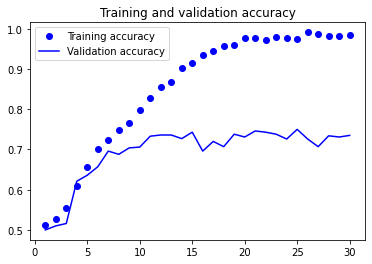

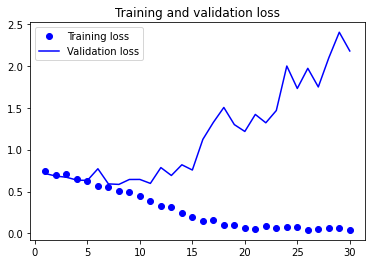

In [12]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [13]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 2s 27ms/step - loss: 0.5973 - accuracy: 0.6870
Test accuracy: 0.687


## Veri çeşitlendirme

In [14]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

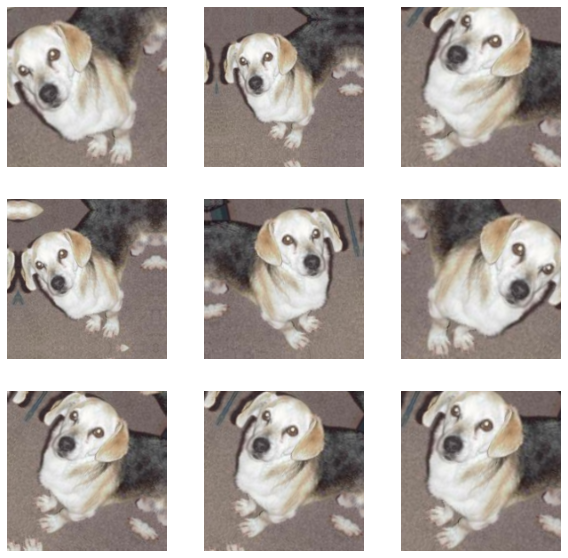

In [15]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [16]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [17]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 8s 96ms/step - loss: 0.7090 - accuracy: 0.5030 - val_loss: 0.6926 - val_accuracy: 0.5600
Epoch 2/30
63/63 [==============================] - 6s 91ms/step - loss: 0.7129 - accuracy: 0.5210 - val_loss: 0.6947 - val_accuracy: 0.5080
Epoch 3/30
63/63 [==============================] - 6s 88ms/step - loss: 0.6945 - accuracy: 0.5605 - val_loss: 0.6456 - val_accuracy: 0.6370
Epoch 4/30
63/63 [==============================] - 7s 102ms/step - loss: 0.6782 - accuracy: 0.5930 - val_loss: 0.6735 - val_accuracy: 0.6000
Epoch 5/30
63/63 [==============================] - 7s 100ms/step - loss: 0.6655 - accuracy: 0.6330 - val_loss: 0.6191 - val_accuracy: 0.6570
Epoch 6/30
63/63 [==============================] - 6s 101ms/step - loss: 0.6208 - accuracy: 0.6720 - val_loss: 0.7888 - val_accuracy: 0.5950
Epoch 7/30
63/63 [==============================] - 7s 101ms/step - loss: 0.6281 - accuracy: 0.6680 - val_loss: 0.6384 - val_accuracy: 0.6520
Epoch 8/3

In [18]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 2s 32ms/step - loss: 0.4578 - accuracy: 0.8085
Test accuracy: 0.808


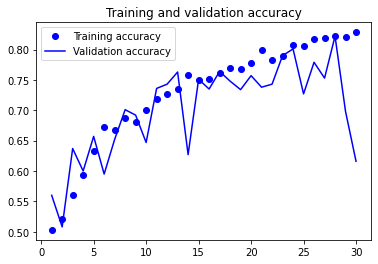

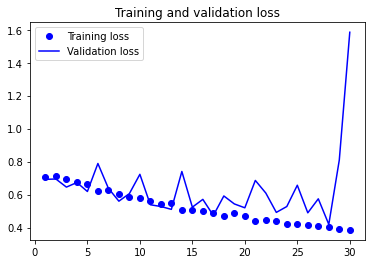

In [19]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## hassas ayar

In [20]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 8s 103ms/step - loss: 0.7279 - accuracy: 0.7285 - val_loss: 0.7193 - val_accuracy: 0.7400
Epoch 2/30
63/63 [==============================] - 6s 100ms/step - loss: 0.4371 - accuracy: 0.8145 - val_loss: 0.5532 - val_accuracy: 0.7930
Epoch 3/30
63/63 [==============================] - 7s 102ms/step - loss: 0.3579 - accuracy: 0.8475 - val_loss: 0.5011 - val_accuracy: 0.8040
Epoch 4/30
63/63 [==============================] - 7s 101ms/step - loss: 0.3269 - accuracy: 0.8615 - val_loss: 0.4743 - val_accuracy: 0.8110
Epoch 5/30
63/63 [==============================] - 7s 102ms/step - loss: 0.3003 - accuracy: 0.8655 - val_loss: 0.4626 - val_accuracy: 0.8140
Epoch 6/30
63/63 [==============================] - 7s 101ms/step - loss: 0.2982 - accuracy: 0.8800 - val_loss: 0.4562 - val_accuracy: 0.8120
Epoch 7/30
63/63 [==============================] - 7s 102ms/step - loss: 0.2961 - accuracy: 0.8750 - val_loss: 0.4509 - val_accuracy: 0.8100
Epoch 

In [21]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 2s 31ms/step - loss: 0.4452 - accuracy: 0.8210
Test accuracy: 0.821
